#### **Meaning of Columns Headers**

In [1]:
#📋 Column Meanings
# Column	Meaning
# CLIENTNUM	Unique ID for each customer (anonymous identifier)
# Attrition_Flag	Whether the customer has left ("Attrited Customer") or stayed ("Existing Customer")
# Customer_Age	Age of the customer
# Gender	Male or Female
# Dependent_count	Number of dependents
# Education_Level	Education level (e.g., Graduate, High School, etc.)
# Marital_Status	Marital status (Married, Single, etc.)
# Income_Category	Income range (e.g., "<$40K", "$60K - $80K", etc.)
# Card_Category	Type of credit card (e.g., Blue, Silver, Platinum, Gold)
# Months_on_book	Duration (in months) the account has been active
# Total_Relationship_Count	Number of products held with the bank
# Months_Inactive_12_mon	Number of months the customer was inactive in the last 12 months
# Contacts_Count_12_mon	Number of contacts (e.g., calls) with the bank in the last 12 months
# Credit_Limit	Credit limit on the card
# Total_Revolving_Bal	Balance carried from one month to the next (not paid off)
# Avg_Open_To_Buy	Average available amount to spend (credit limit - current balance)
# Total_Amt_Chng_Q4_Q1	Change in transaction amount from Q1 to Q4 (previous year)
# Total_Trans_Amt	Total transaction amount in the last 12 months
# Total_Trans_Ct	Total number of transactions in the last 12 months
# Total_Ct_Chng_Q4_Q1	Change in transaction count from Q1 to Q4 (previous year)
# Avg_Utilization_Ratio	Ratio of revolving balance to credit limit (how much of the credit is used)

# https://creativecommons.org/publicdomain/zero/1.0/

#### **Import Packages**

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

#### **Loading Data, Preprocessing and Features Engineering**

In [3]:
raw_data = pd.read_csv('BankChurners.csv/BankChurners.csv')
df_cc = raw_data.copy()
df_cc['Attrition_Flag'] = df_cc['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
marital_dummies = pd.get_dummies(df_cc['Marital_Status'], prefix='Marital').astype(int)
df_cc = pd.concat([df_cc.drop('Marital_Status', axis=1), marital_dummies], axis=1)

education_dummies = pd.get_dummies(df_cc['Education_Level'], prefix='Edu').astype(int)
df_cc = pd.concat([df_cc.drop('Education_Level', axis=1), education_dummies], axis=1)

df_cc['Gender'] = df_cc['Gender'].map({'M': 1, 'F': 0})
df_cc['Gender'] = df_cc['Gender'].replace('Unknown', np.nan)

card_order = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}
df_cc['Card_Category'] = df_cc['Card_Category'].map(card_order)

income_map = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4,
    'Unknown': np.nan  # Or use -1 or median later
}

df_cc['Income_Category'] = df_cc['Income_Category'].map(income_map)

df_cc['Income_Unknown_Flag'] = (df_cc['Income_Category'].isna()).astype(int)

df_cc.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], axis=1, inplace=True)

df_cc.dropna(inplace=True)

In [4]:
features = ['Customer_Age', 'Gender',
       'Dependent_count', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Marital_Divorced', 'Marital_Married',
       'Marital_Single', 'Marital_Unknown', 'Edu_College',
       'Edu_Doctorate', 'Edu_Graduate', 'Edu_High School',
       'Edu_Post-Graduate', 'Edu_Uneducated', 'Edu_Unknown',
       'Income_Unknown_Flag']

#### **Splitting, Scaling and Training Data**

In [5]:
X = df_cc[features]
y = df_cc['Attrition_Flag']

In [6]:
# Split data
X = df_cc[features]
y = df_cc['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced'))  # Replace with any classifier
])

# Train pipeline
pipe.fit(X_train, y_train)
y_proba = pipe.predict_proba(X_test)[:, 1]
y_pred = pipe.predict(X_test)

#### **DataFrame for better interpretation**

In [7]:
selected_features = ['Customer_Age', 'Gender',
       'Dependent_count', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Marital_Divorced', 'Marital_Married',
       'Marital_Single', 'Marital_Unknown', 'Edu_College',
       'Edu_Doctorate', 'Edu_Graduate', 'Edu_High School',
       'Edu_Post-Graduate', 'Edu_Uneducated', 'Edu_Unknown',
       'Income_Unknown_Flag']

# Create DataFrame with actual, predicted, and predicted probability
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability_Positive': y_proba
}, index=X_test.index)

# Add selected features from X_test
results_df = pd.concat([results_df, X_test[selected_features]], axis=1)

# Add correctness flag
results_df['Correct'] = (results_df['Actual'] == results_df['Predicted']).astype(int)

# Display first few rows
results_df.head()


,Actual,Predicted,Probability_Positive,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Marital_Unknown,Edu_College,Edu_Doctorate,Edu_Graduate,Edu_High School,Edu_Post-Graduate,Edu_Uneducated,Edu_Unknown,Income_Unknown_Flag,Correct
2130,1,1,0.628259,59,1,2,1.0,0,50,6,...,0,0,0,0,1,0,0,0,0,1
5655,1,1,0.999219,64,1,1,0.0,0,52,5,...,0,0,0,1,0,0,0,0,0,1
1135,1,1,0.814357,38,1,4,3.0,2,36,6,...,0,0,0,0,1,0,0,0,0,1
3843,1,0,0.087116,50,0,4,1.0,0,22,5,...,0,0,0,0,0,0,1,0,0,0
6593,1,1,0.949458,46,1,2,4.0,0,34,6,...,0,0,1,0,0,0,0,0,0,1


#### **Rearranging Columns**

In [8]:
results_df = results_df[['Customer_Age',
       'Gender', 'Dependent_count', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Marital_Divorced', 'Marital_Married',
       'Marital_Single', 'Marital_Unknown', 'Edu_College',
       'Edu_Doctorate', 'Edu_Graduate', 'Edu_High School',
       'Edu_Post-Graduate', 'Edu_Uneducated', 'Edu_Unknown',
       'Income_Unknown_Flag', 'Actual', 'Predicted', 'Probability_Positive', 'Correct']]

In [9]:
results_df.head()

,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Edu_Graduate,Edu_High School,Edu_Post-Graduate,Edu_Uneducated,Edu_Unknown,Income_Unknown_Flag,Actual,Predicted,Probability_Positive,Correct
2130,59,1,2,1.0,0,50,6,3,2,2701.0,...,0,1,0,0,0,0,1,1,0.628259,1
5655,64,1,1,0.0,0,52,5,3,2,2563.0,...,1,0,0,0,0,0,1,1,0.999219,1
1135,38,1,4,3.0,2,36,6,1,3,34516.0,...,0,1,0,0,0,0,1,1,0.814357,1
3843,50,0,4,1.0,0,22,5,2,3,7853.0,...,0,0,0,1,0,0,1,0,0.087116,0
6593,46,1,2,4.0,0,34,6,3,1,3499.0,...,0,0,0,0,0,0,1,1,0.949458,1


#### **Evaluation**

In [10]:
# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# AUC-ROC (only for binary classifiers)
roc_auc = roc_auc_score(y_test, y_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report (includes precision, recall, f1, support per class)
report = classification_report(y_test, y_pred)


In [11]:
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Accuracy: 0.8275097060454798
Precision: 0.956060606060606
Recall: 0.833003300330033
F1 Score: 0.890299823633157
ROC AUC: 0.8956591492482581

Confusion Matrix:
 [[ 230   58]
 [ 253 1262]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.80      0.60       288
           1       0.96      0.83      0.89      1515

    accuracy                           0.83      1803
   macro avg       0.72      0.82      0.74      1803
weighted avg       0.88      0.83      0.84      1803



#### **Visuals**

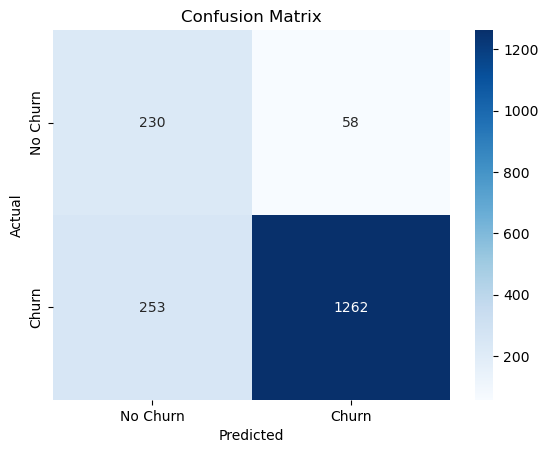

In [12]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **Class Weights**

In [13]:
model = pipe.named_steps['model']

print("Class Weights:", model.class_weight)


Class Weights: balanced


In [14]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
print("Computed class weights:", dict(zip(np.unique(y_train), class_weights)))

Computed class weights: {np.int64(0): np.float64(3.1302083333333335), np.int64(1): np.float64(0.595049504950495)}


#### **GridSearch**

In [15]:
# Redefine pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

# Parameter grid
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__class_weight': [None, 'balanced']
}

# Grid search
grid = GridSearchCV(pipe, param_grid, scoring='f1', cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)


Best params: {'model__C': 10, 'model__class_weight': None}
Best score: 0.9451684654770579


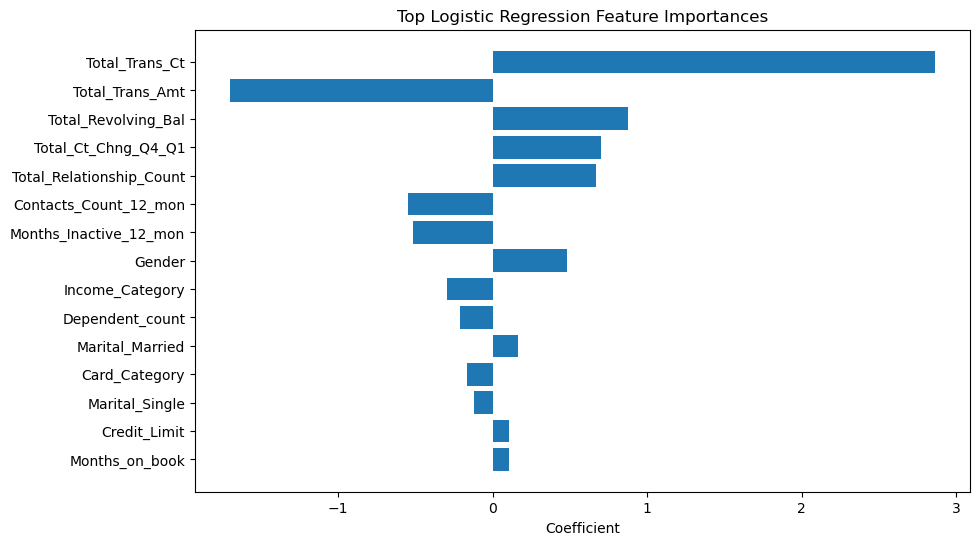

In [16]:
# Get trained model
best_model = grid.best_estimator_.named_steps['model']

# Get feature names after scaling (same as input to scaler)
feature_names = X_train.columns

# Get coefficients
coefs = best_model.coef_[0]

# Create importance DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values('Abs_Coefficient', ascending=False)

# Plot top N
top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(top_n), importance_df['Coefficient'].head(top_n))
plt.xlabel("Coefficient")
plt.title("Top Logistic Regression Feature Importances")
plt.gca().invert_yaxis()
plt.show()
